#Customer Churn Prediction using ML models

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('customer_churn_data.csv')
df1 = df.copy()

#Cleaning the Dataset

In [109]:
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df1=df1.interpolate()

df1=df1.dropna()

number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

<ipython-input-109-1fdf67f0abb2>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1=df1.interpolate()


# Data Modelling

Renaming columns

In [110]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})

Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()

dict_keys(['Churned', 'Stayed', 'Joined'])

Replacing the Gender column in the dataset with Label Encoding

0 for Female

1 for Male

In [111]:
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

<ipython-input-111-b945c2829cd1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)


Replacing the columns with 'yes' and 'no' output by Label Encoding

0 for No

1 for Yes

In [112]:
yes_and_no=[  'Paperless Billing', 'Unlimited Data',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

<ipython-input-112-1a7f0315e1aa>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'No':0,'Yes':1},inplace=True)


Replacing 'Phone Service' with '1'

In [113]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)


In [115]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])


In [116]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

## Dealing with Imbalance Data

Dropping the Customer_Status

i.e. The column tht we have to predict and set as a dependent variable

In [117]:
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']

In [118]:
X.head(5)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
2,1,0.508197,0,0.000,0.0,0.042254,1,0.666462,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,0.967213,1,0.000,0.1,0.169014,1,0.547386,0,1,...,False,False,False,False,False,False,False,False,False,False
5,0,0.065574,0,0.375,0.0,0.112676,1,0.321691,0,1,...,False,False,False,False,False,False,False,False,False,False
6,0,0.786885,1,0.000,0.1,0.985915,1,0.182598,0,1,...,False,False,False,False,False,False,False,False,False,False
7,1,0.540984,1,0.000,0.8,0.873239,1,0.243873,1,1,...,False,False,False,False,False,False,False,False,False,False


In [119]:
y.head(5)


,Customer_Status
2,0
3,0
5,2
6,2
7,2


# Data Model Building

## Spliiting the data in Training and Test Data

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [121]:
len(X_train)

1755

In [122]:
X_train[:10]

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
5086,1,0.213115,0,0.000,0.0,0.126761,1,0.135417,0,1,...,False,False,False,False,False,False,False,False,False,False
1686,0,0.000000,0,0.000,0.0,0.140845,1,0.815768,0,1,...,False,False,False,False,False,False,False,False,False,False
3655,1,0.737705,0,0.000,0.0,0.000000,1,0.154003,1,1,...,False,False,False,False,False,False,False,False,False,False
697,1,0.983607,1,0.000,0.1,0.408451,1,0.959967,1,1,...,False,False,False,False,False,False,False,False,False,False
6685,0,0.721311,0,0.000,0.0,0.478873,1,0.247549,1,1,...,False,False,False,False,False,False,False,False,False,False
5617,0,0.262295,0,0.000,0.0,0.084507,1,0.367034,1,1,...,False,False,False,False,False,False,False,False,False,False
2938,1,0.098361,0,0.000,0.0,0.873239,1,0.443423,1,1,...,False,False,False,False,False,False,False,False,False,False
6323,1,0.688525,0,0.000,0.0,0.000000,1,0.257557,0,1,...,False,False,False,False,False,False,False,False,False,False
3382,1,0.868852,0,0.000,0.0,0.014085,1,0.825368,0,1,...,False,False,False,False,False,False,False,False,False,False
1184,1,0.377049,1,0.375,0.8,0.774648,1,0.813725,1,1,...,False,False,False,False,False,False,False,False,False,False


Importing the required files for the model that is to applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier


## Importing Models

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [124]:
model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]

        }
    },
}

In [125]:
from sklearn.model_selection import ShuffleSplit

Getting the best_score from the applied models

In [126]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,random_forest,0.791800,{'n_estimators': 10}
1,logistic_regression,0.792711,{'C': 1}
2,naive_bayes_gaussian,0.374487,{}
3,decision_tree,0.795444,{'criterion': 'gini'}
4,XGB_Classifier,0.821868,{'base_score': 0.5}


It was concluded that XGB_Classifier was giving us the best_score in the dataset

## Selecting the model with best score for the dataset

In [127]:
reg=XGBClassifier()
reg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [128]:
reg.score(X_test, y_test)

0.826879271070615

We got an accuracy of 82.86 percent in the testing dataset

## Predicting values from the model build to check the accuracy

In [129]:
y_predicted = reg.predict(X_test)
y_predicted[:7]

array([2, 0, 1, 0, 0, 2, 2])

## Verifying the actual values with the predicted values

In [130]:
y_test[:7]

,Customer_Status
525,2
3086,0
2231,1
5041,0
4165,0
6042,0
2867,2


## Importing Confusion Matrx

Text(95.72222222222221, 0.5, 'Truth')

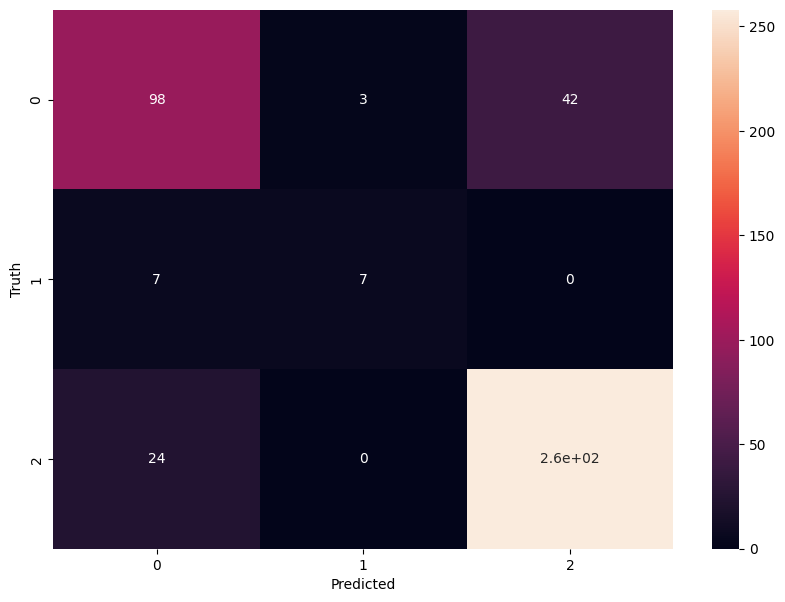

In [131]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Importing Classification Report

In [132]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       143
           1       0.70      0.50      0.58        14
           2       0.86      0.91      0.89       282

    accuracy                           0.83       439
   macro avg       0.77      0.70      0.73       439
weighted avg       0.82      0.83      0.82       439



In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.826879271070615

In the end we conclude that the Telecom Customer Churn Prediction was best worked with XGB_Classifier with an accuracy score of 82.86%